In [17]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np
import pandas_datareader
print (pandas_datareader.__version__)
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

0.10.0


In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and others.
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC',  
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
'American Express': 'AXP',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Toyota': 'TM',
'Honda': 'HMC',
'Exxon': 'XOM',
'Chevron': 'CVX',
'Valero Energy': 'VLO',
'Ford': 'F',
'Bank of America': 'BAC'}

#sort the dictionary according to company tag names
#here lambda is an inline function we used it to sort the companies dictionary according to company tickers

companies=sorted(companies_dict.items(),key=lambda x:x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Microsoft', 'MSFT'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [3]:
# now we will fetch the data related to the companies above using datareader library from morningstar

#data source
data_source='yahoo'

# Define the start and end dates that we want to see, data present between these dates will be fetched
start_date = '2015-01-01'
end_date = '2017-12-31'

#Use pandas_reader.data.DataReader to load the desired data
panel_data = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)


[DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None), MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',  'WBA'),
            ('Adj Close',  'NOC'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'LMT'),
            ('Adj Close',  'MCD'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'IBM'),
            ('Adj Close',  'TXN'),
            ...
            (   'Volume',  'PEP'),
            (   'Volume',   'KO'),
            (   'Volume',  'JNJ'),
            (   'Volume',   'TM'),
            (   'Volume',  '

In [4]:
df=pd.DataFrame(panel_data)
df

Attributes  Adj Close                                                \
Symbols          AMZN       AAPL        WBA         NOC          BA   
Date                                                                  
2014-12-31  15.517500  24.915257  61.661694  130.392700  113.683441   
2015-01-02  15.426000  24.678251  61.499832  129.570007  113.657219   
2015-01-05  15.109500  23.983023  60.286041  126.836327  112.870071   
2015-01-06  14.764500  23.985283  60.439785  127.535202  111.540634   
2015-01-07  14.921000  24.321606  61.985374  131.569366  113.272377   
...               ...        ...        ...         ...         ...   
2017-12-22  58.417999  41.731140  62.135544  282.266541  281.228180   
2017-12-26  58.838001  40.672440  62.639744  282.322235  281.475952   
2017-12-27  59.112999  40.679577  62.263737  284.477936  281.723755   
2017-12-28  59.305000  40.794033  62.332100  286.457092  282.419464   
2017-12-29  58.473499  40.352901  62.058628  285.174835  281.047150   

Attributes                                                            ...  \
Symbols            LMT         MCD       INTC         IBM        TXN  ...   
Date                                                                  ...   
2014-12-31  157.265915   76.953262  29.559610  111.056694  43.661331  ...   
2015-01-02  157.870193   76.591911  29.616636  112.178101  43.669495  ...   
2015-01-05  154.587219   75.746002  29.282671  110.412987  42.991749  ...   
2015-01-06  153.860367   75.885612  28.736923  108.031776  42.281334  ...   
2015-01-07  155.844894   77.207870  29.339685  107.325745  43.040752  ...   
...                ...         ...        ...         ...        ...  ...   
2017-12-22  282.312134  153.992554  41.621922  117.550697  91.851448  ...   
2017-12-26  282.738068  153.875778  41.069328  117.805077  91.869095  ...   
2017-12-27  283.563690  155.115509  41.096066  118.036316  92.204285  ...   
2017-12-28  285.925018  155.501801  41.194111  118.737770  92.460098  ...   
2017-12-29  284.992889  154.621384  41.140629  118.259827  92.124901  ...   

Attributes     Volume                                                          \
Symbols           PEP          KO        JNJ        TM        HMC         XOM   
Date                                                                            
2014-12-31  3727400.0   9369500.0  6202100.0  151100.0   981300.0  11337200.0   
2015-01-02  3545700.0   9921100.0  5753600.0  250000.0  1150900.0  10220400.0   
2015-01-05  6441000.0  26292600.0  8079300.0  240600.0  1483600.0  18502400.0   
2015-01-06  6195000.0  16897500.0  7428000.0  285600.0   773800.0  16670700.0   
2015-01-07  6526300.0  13412300.0  7931700.0  385700.0   814600.0  13590700.0   
...               ...         ...        ...       ...        ...         ...   
2017-12-22  2045600.0   5406300.0  4665600.0   75800.0   710500.0  10161400.0   
2017-12-26  2156300.0   6100400.0  3271100.0   48400.0   235700.0   4777200.0   
2017-12-27  2465100.0   5660600.0  3753600.0   77800.0   286800.0   7000600.0   
2017-12-28  1999300.0   6538900.0  2485000.0  102300.0   221300.0   7495300.0   
2017-12-29  3116400.0   8371500.0  4452900.0  122100.0   234600.0   8523400.0   

Attributes                                                  
Symbols            CVX        VLO           F          BAC  
Date                                                        
2014-12-31   6411800.0  5925900.0  17930200.0   57819600.0  
2015-01-02   5898800.0  5897000.0  24777900.0   48951100.0  
2015-01-05  11758100.0  7732700.0  44079700.0  105605500.0  
2015-01-06  11591600.0  8586800.0  32981600.0  144912400.0  
2015-01-07  10353800.0  8825800.0  26065300.0  104603800.0  
...                ...        ...         ...          ...  
2017-12-22   4735100.0  1837200.0  17876200.0   54203000.0  
2017-12-26   3348500.0  1442900.0  11664600.0   42371200.0  
2017-12-27   3452300.0  2388300.0  17005600.0   35111800.0  
2017-12-28   2191800.0  1835700.0  14793500.0   37914900.0 

In [5]:
df.columns.values

array([('Adj Close', 'AMZN'), ('Adj Close', 'AAPL'), ('Adj Close', 'WBA'),
       ('Adj Close', 'NOC'), ('Adj Close', 'BA'), ('Adj Close', 'LMT'),
       ('Adj Close', 'MCD'), ('Adj Close', 'INTC'), ('Adj Close', 'IBM'),
       ('Adj Close', 'TXN'), ('Adj Close', 'MA'), ('Adj Close', 'MSFT'),
       ('Adj Close', 'GE'), ('Adj Close', 'AXP'), ('Adj Close', 'PEP'),
       ('Adj Close', 'KO'), ('Adj Close', 'JNJ'), ('Adj Close', 'TM'),
       ('Adj Close', 'HMC'), ('Adj Close', 'XOM'), ('Adj Close', 'CVX'),
       ('Adj Close', 'VLO'), ('Adj Close', 'F'), ('Adj Close', 'BAC'),
       ('Close', 'AMZN'), ('Close', 'AAPL'), ('Close', 'WBA'),
       ('Close', 'NOC'), ('Close', 'BA'), ('Close', 'LMT'),
       ('Close', 'MCD'), ('Close', 'INTC'), ('Close', 'IBM'),
       ('Close', 'TXN'), ('Close', 'MA'), ('Close', 'MSFT'),
       ('Close', 'GE'), ('Close', 'AXP'), ('Close', 'PEP'),
       ('Close', 'KO'), ('Close', 'JNJ'), ('Close', 'TM'),
       ('Close', 'HMC'), ('Close', 'XOM'), ('Close', '

In [6]:
# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AMZN     15.517500
AAPL     27.594999
WBA      76.199997
NOC     147.389999
BA      129.979996
LMT     192.570007
MCD      93.699997
INTC     36.290001
IBM     153.384323
TXN      53.470001
MA       86.160004
MSFT     46.450001
GE      194.384613
AXP      93.040001
PEP      94.559998
KO       42.220001
JNJ     104.570000
TM      125.480003
HMC      29.520000
XOM      92.449997
CVX     112.180000
VLO      49.500000
F        15.500000
BAC      17.889999
Name: 2014-12-31 00:00:00, dtype: float64


In [7]:
df['Open']['AMZN']

Date
2014-12-31    15.577500
2015-01-02    15.629000
2015-01-05    15.350500
2015-01-06    15.112000
2015-01-07    14.875000
                ...    
2017-12-22    58.604000
2017-12-26    58.417999
2017-12-27    58.995499
2017-12-28    59.450001
2017-12-29    59.117500
Name: AMZN, Length: 756, dtype: float64

In [11]:
#convert stock open and close values in array and take transpose
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

In [12]:
row, col = stock_close.shape 
row,col

(24, 756)

In [13]:
movements = stock_close - stock_open

for i in range(0, len(companies)):
   print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: -4.196586608886719
Company: Amazon, Change: 3.5624732971191406
Company: American Express, Change: -5.940071105957031
Company: Boeing, Change: 72.03007507324219
Company: Bank of America, Change: 100.44984436035156
Company: Chevron, Change: 57.899932861328125
Company: Ford, Change: 51.290016174316406
Company: General Electrics, Change: 19.52003288269043
Company: Honda, Change: 14.980926513671875
Company: IBM, Change: 28.409912109375
Company: Intel, Change: 23.569869995117188
Company: Johnson & Johnson, Change: 28.480026245117188
Company: Coca Cola, Change: 36.07719421386719
Company: Lockheed Martin, Change: 5.600105285644531
Company: MasterCard, Change: 36.96997833251953
Company: McDonalds, Change: 11.459976196289062
Company: Microsoft, Change: 30.619949340820312
Company: Northrop Grumman, Change: -17.430099487304688
Company: Pepsi, Change: -8.180000305175781
Company: Toyota, Change: 9.929985046386719
Company: Texas Instruments, Change: 27.099990844726562
Company:

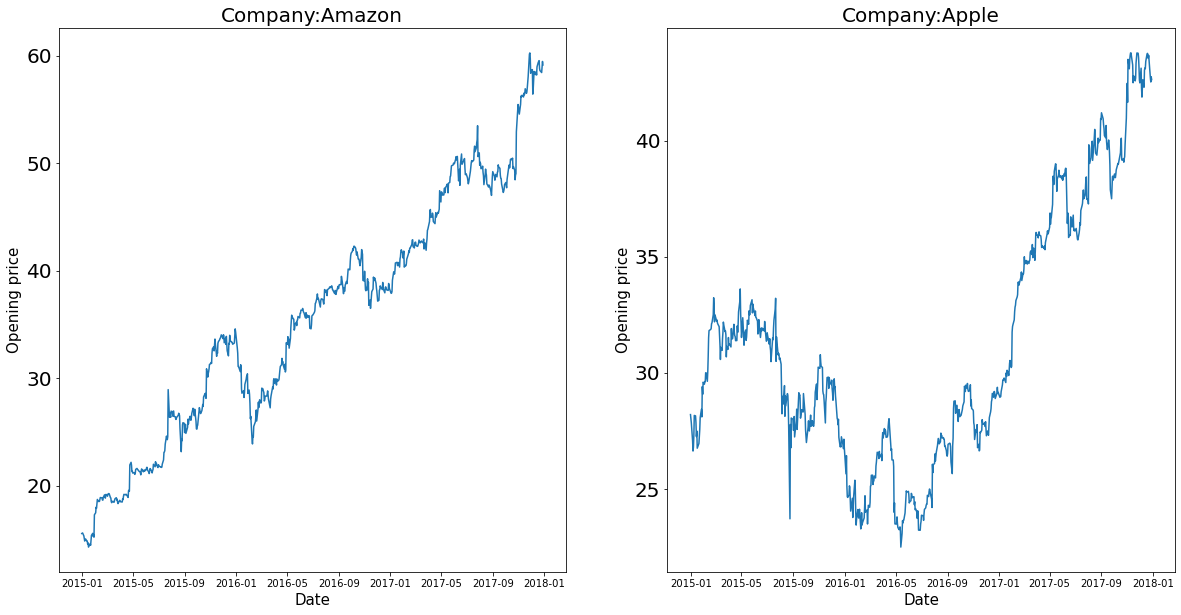

In [14]:
#visualising the data for amazon and apple
plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AMZN'])
plt.subplot(1,2,2) 
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AAPL'])

In [18]:
# Create a normalizer: normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.26029795916062815
-0.259844372052625
0.0009127196935102774


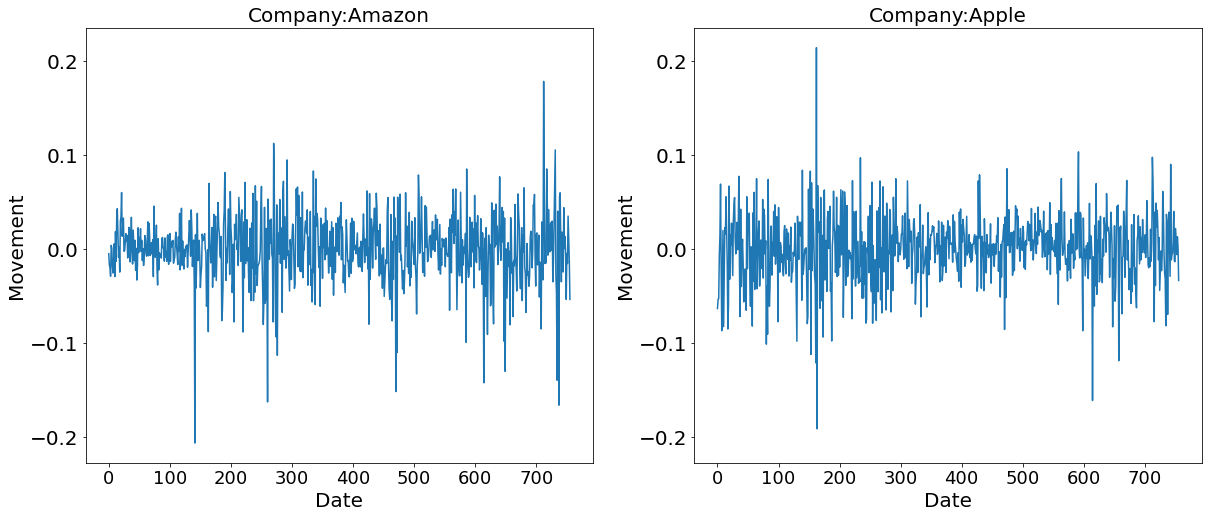

In [22]:
# after normalization
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(new[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(new[1])

In [19]:
# lets create a pipeline
normalizer=Normalizer()
kmeans=KMeans(n_clusters=10,max_iter=1000)
pipeline=make_pipeline(normalizer,kmeans)
pipeline.fit(movements)
labels=pipeline.predict(movements)
df1 = pd.DataFrame({'labels':labels,'companies':companies}).sort_values(by=['labels'],axis = 0)
df1

,labels,companies
3,0,"(Boeing, BA)"
4,0,"(Bank of America, BAC)"
5,0,"(Chevron, CVX)"
8,1,"(Honda, HMC)"
0,2,"(Apple, AAPL)"
10,2,"(Intel, INTC)"
11,2,"(Johnson & Johnson, JNJ)"
1,2,"(Amazon, AMZN)"
21,3,"(Valero Energy, VLO)"
23,4,"(Exxon, XOM)"


In [20]:
print(kmeans.inertia_)

6.857032741774853


    labels                 companies
3        0              (Boeing, BA)
5        0            (Chevron, CVX)
16       0         (Microsoft, MSFT)
15       0          (McDonalds, MCD)
14       0          (MasterCard, MA)
21       1      (Valero Energy, VLO)
8        1              (Honda, HMC)
18       1              (Pepsi, PEP)
17       1   (Northrop Grumman, NOC)
13       1    (Lockheed Martin, LMT)
0        2             (Apple, AAPL)
20       3  (Texas Instruments, TXN)
19       3              (Toyota, TM)
2        4   (American Express, AXP)
4        4    (Bank of America, BAC)
11       5  (Johnson & Johnson, JNJ)
10       5             (Intel, INTC)
9        5                (IBM, IBM)
1        5            (Amazon, AMZN)
22       6           (Walgreen, WBA)
23       6              (Exxon, XOM)
6        7                 (Ford, F)
7        8   (General Electrics, GE)
12       9           (Coca Cola, KO)


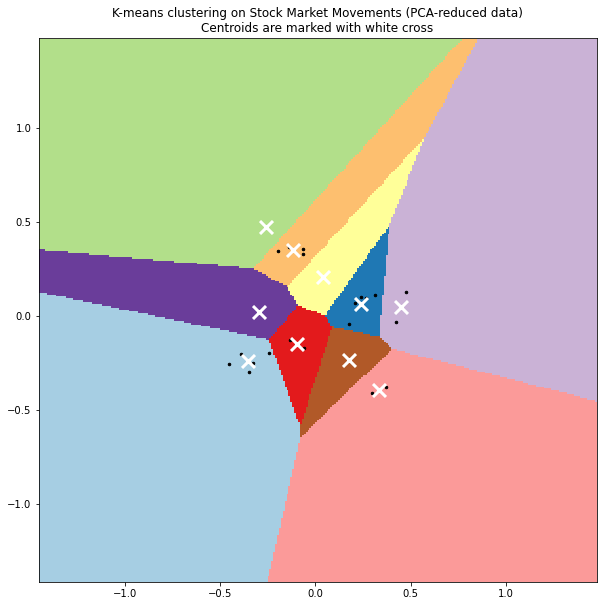

In [23]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

reduced_data = PCA(n_components=2).fit_transform(new)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies: df
df3 = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df3.sort_values('labels'))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()